In [1]:
import pandas as pd

tha = pd.read_csv('./data/avocado.csv').drop('Unnamed: 0',1)

In [2]:
tha.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [3]:
tha_ohe = pd.get_dummies(tha)

In [15]:
from sklearn.cluster import KMeans, DBSCAN

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np

In [16]:
from IPython.display import display, HTML

In [20]:
km = KMeans(n_clusters=4)
dbs = DBSCAN()

In [21]:
km.fit(tha_ohe)
dbs.fit_predict(tha_ohe)

array([-1, -1, -1, ..., -1, -1, -1])

In [22]:
tha['cluster'] = km.predict(tha_ohe)
tha['dbs_cluster'] = dbs.fit_predict(tha_ohe)

In [23]:
display(tha.groupby(['cluster']).size())

cluster
0    16776
1       90
2     1304
3       79
dtype: int64

In [38]:
X = pd.to_datetime(tha.Date)
Y = tha.AveragePrice
plot_df = pd.DataFrame({'Date':X,'AveragePrice':Y, 'cluster': tha['cluster']})

In [39]:
plt.figure(figsize=(20,10))
plt.title("Visualizing Clusters",size=24)
plt.ylabel("Average Price Per Avocado On Day",size=16)
plt.yticks(size=14)
plt.xlabel("Date",size=16)
plt.xticks(size=14)
plt.scatter(X.values, Y, c=tha.cluster)

In [40]:
g = sns.FacetGrid(plot_df, col='cluster',size=6,col_wrap=2)
g.map(plt.scatter,"Date","AveragePrice")

In [46]:
display(tha[tha['cluster'] != 0].groupby(['cluster','region']).size())

cluster  region      
1        TotalUS          90
2        California      169
         GreatLakes      159
         Houston           1
         LosAngeles      146
         Midsouth        145
         NewYork           4
         Northeast       169
         Plains           11
         SouthCentral    169
         Southeast       162
         West            169
3        TotalUS          79
dtype: int64

In [42]:
tha.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'cluster', 'dbs_cluster'],
      dtype='object')

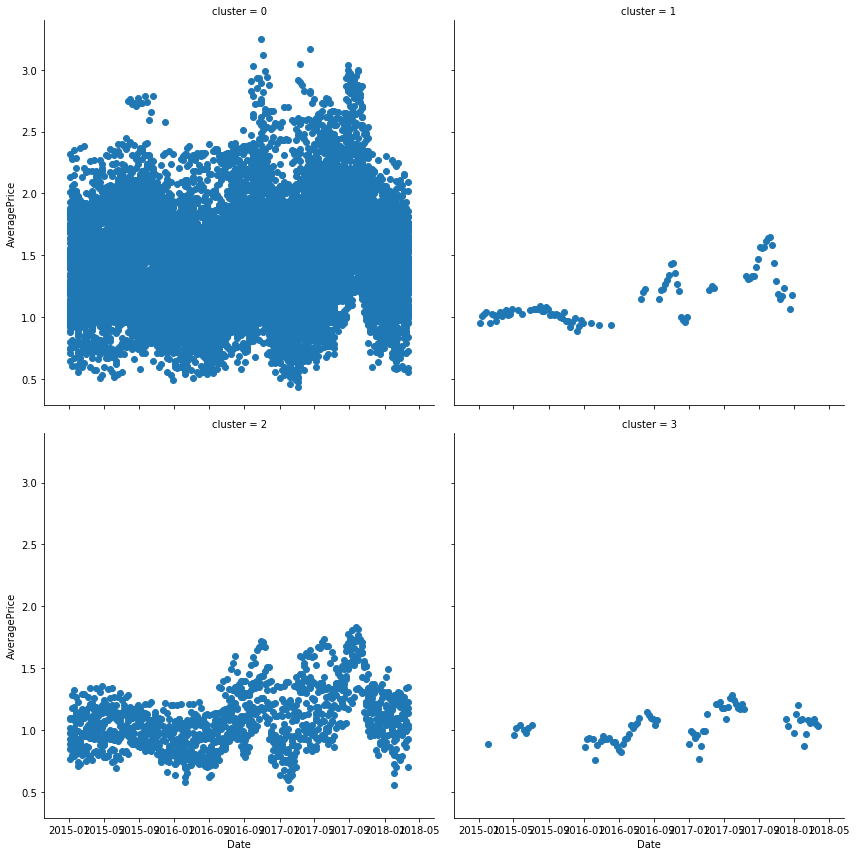

In [32]:
g = sns.FacetGrid(plot_df, col='cluster',size=6,col_wrap=2)
g.map(plt.scatter,"Date","AveragePrice")